<a href="https://colab.research.google.com/github/ajaythakur3369/DIGIBHEM/blob/main/Task_1_Fake_News_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Fake News Detection**
## **Developed By - Ajay Thakur (2016kuec2026@iiitkota.ac.in)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota (An Institute of National Importance under an Act of Parliament)**
## **Submitted To - Digital Bhem**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/DIGIBHEM/blob/main/Task_1_Fake_News_Detection.ipynb)**

## **Project Link (Drive) - [Click here](https://colab.research.google.com/drive/1pVlzmcb55KY40jWwU8mxNL4smpDnujBs)**

# **Problem Statement -**

**To build a model that can identify fake news articles with high accuracy using a variety of algorithms, such as support vector machines, naive Bayes classifiers, or deep learning models.**

# **Let's Begin !**

In [ ]:
# Import all the required librarimport pandas as pd
import numpy as n
impb.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

**Read datasets**

In [ ]:
# Access the Drive from Colab, for accessing the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/folders/Fake.csv")
true = pd.read_csv("/content/drive/MyDrive/folders/True.csv")

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.shape

(21417, 4)

**Data cleaning and preparation**

In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop = True)

In [ ]:
# Check the data
data.head()

,title,text,subject,date,target
0,DNC PAY TO PLAY LIST REVEALED: Federal Positio...,The hacker Guccifer 2.0 released more DNC e-ma...,politics,"Sep 14, 2016",fake
1,What Beyoncé Just Announced She Is Doing For ...,While so many keep trashing Beyonc Knowles fo...,News,"February 22, 2016",fake
2,Trump's body language during debate raises soc...,NEW YORK (Reuters) - U.S. Republican presiden...,politicsNews,"October 10, 2016",true
3,Republican Obstructionism Is About To Make An...,"An elderly, disabled couple in New Hampshire i...",News,"May 31, 2016",fake
4,Former White House aide Gorka joins pro-Trump ...,"LONDON (Reuters) - Sebastian Gorka, a former a...",politicsNews,"September 19, 2017",true


In [ ]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"], axis = 1, inplace = True)
data.head()

,title,text,subject,target
0,DNC PAY TO PLAY LIST REVEALED: Federal Positio...,The hacker Guccifer 2.0 released more DNC e-ma...,politics,fake
1,What Beyoncé Just Announced She Is Doing For ...,While so many keep trashing Beyonc Knowles fo...,News,fake
2,Trump's body language during debate raises soc...,NEW YORK (Reuters) - U.S. Republican presiden...,politicsNews,true
3,Republican Obstructionism Is About To Make An...,"An elderly, disabled couple in New Hampshire i...",News,fake
4,Former White House aide Gorka joins pro-Trump ...,"LONDON (Reuters) - Sebastian Gorka, a former a...",politicsNews,true


In [ ]:
# Removing the title (we will only use the text)
data.drop(["title"], axis = 1, inplace = True)
data.head()

,text,subject,target
0,The hacker Guccifer 2.0 released more DNC e-ma...,politics,fake
1,While so many keep trashing Beyonc Knowles fo...,News,fake
2,NEW YORK (Reuters) - U.S. Republican presiden...,politicsNews,true
3,"An elderly, disabled couple in New Hampshire i...",News,fake
4,"LONDON (Reuters) - Sebastian Gorka, a former a...",politicsNews,true


In [ ]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,the hacker guccifer 2.0 released more dnc e-ma...,politics,fake
1,while so many keep trashing beyonc knowles fo...,News,fake
2,new york (reuters) - u.s. republican presiden...,politicsNews,true
3,"an elderly, disabled couple in new hampshire i...",News,fake
4,"london (reuters) - sebastian gorka, a former a...",politicsNews,true


In [ ]:
# Remove punctuation
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
# Check the top 5 number of rows of the dataset
data.head()

,text,subject,target
0,the hacker guccifer 20 released more dnc email...,politics,fake
1,while so many keep trashing beyonc knowles fo...,News,fake
2,new york reuters us republican presidential ...,politicsNews,true
3,an elderly disabled couple in new hampshire is...,News,fake
4,london reuters sebastian gorka a former advis...,politicsNews,true


In [ ]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data.head()

,text,subject,target
0,hacker guccifer 20 released dnc emails overnig...,politics,fake
1,many keep trashing beyonc knowles audacity spe...,News,fake
2,new york reuters us republican presidential no...,politicsNews,true
3,elderly disabled couple new hampshire sufferin...,News,fake
4,london reuters sebastian gorka former adviser ...,politicsNews,true



**Basic data exploration**

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


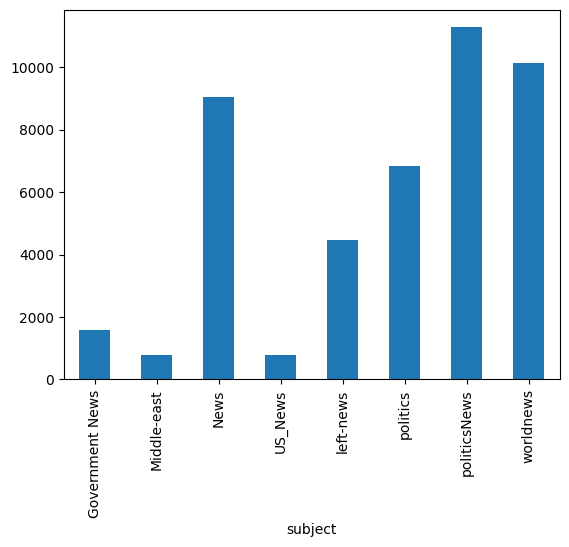

In [ ]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind = "bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


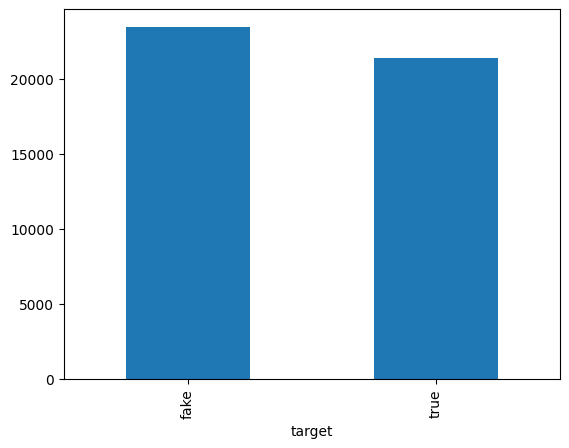

In [ ]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind = "bar")
plt.show()

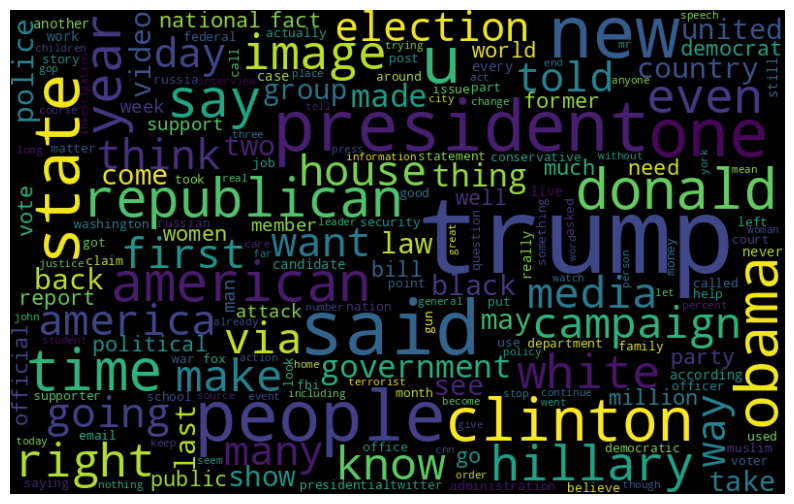

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height = 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

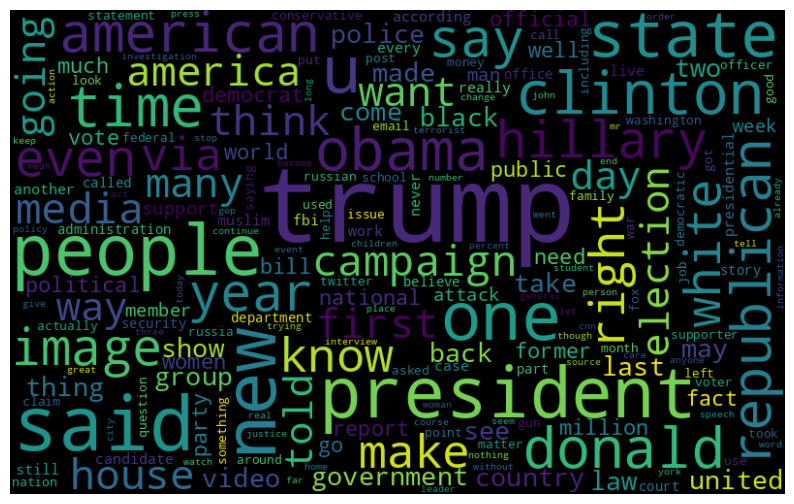

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width = 800, height = 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize = (12, 8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation = 'vertical')
    plt.show()

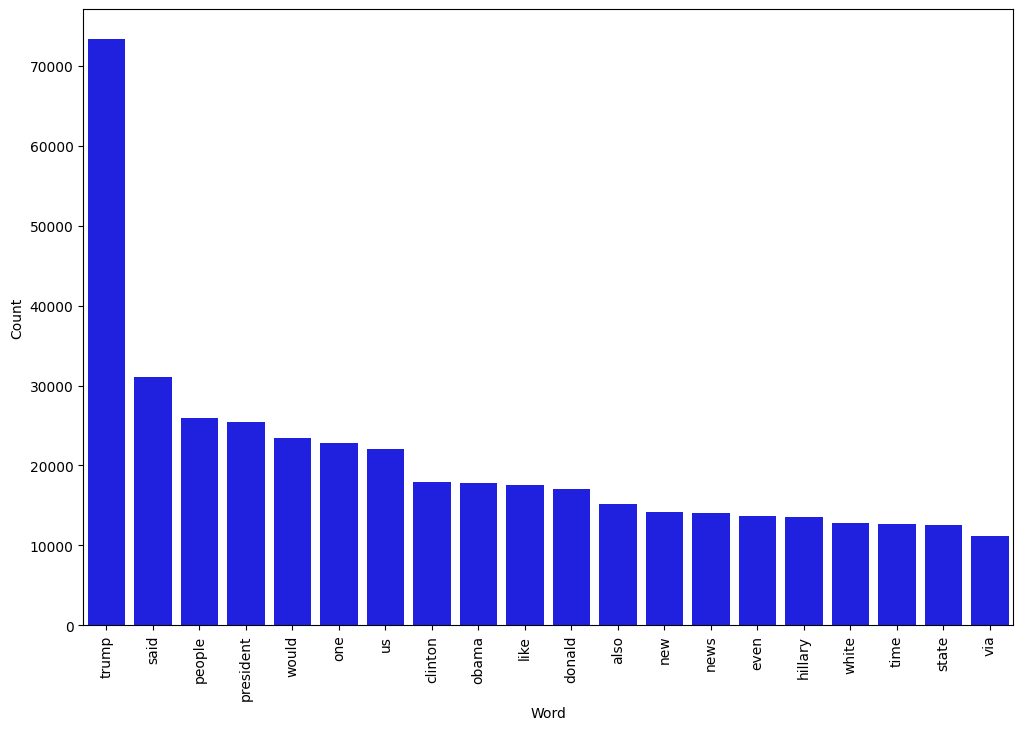

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

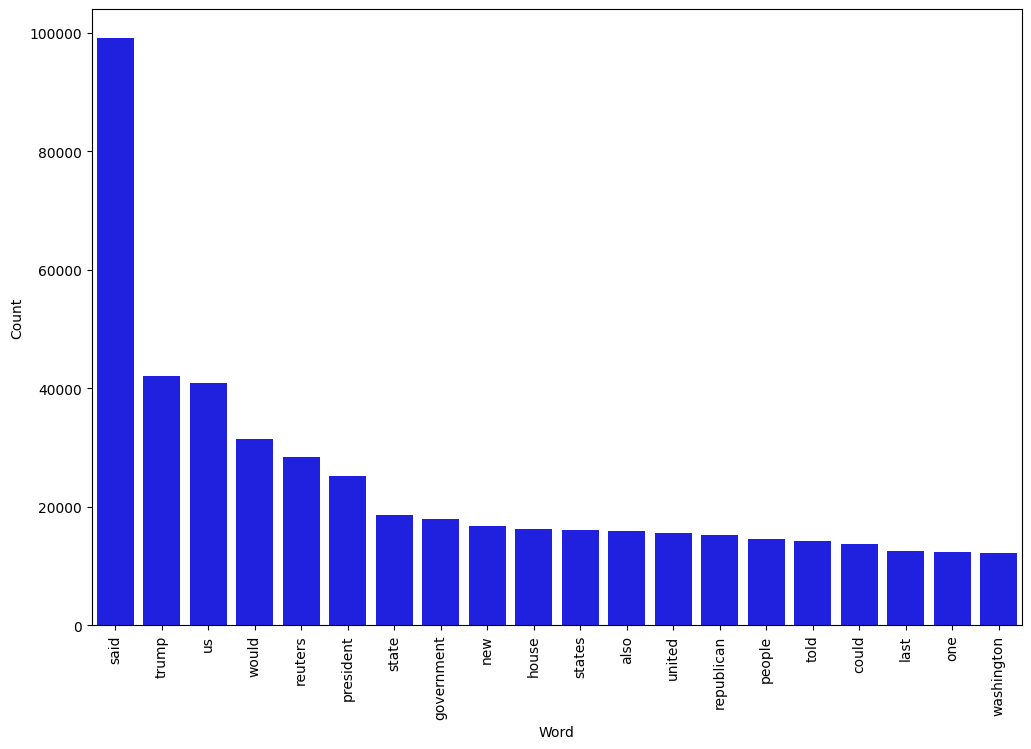

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

**Modeling**

In [ ]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = "center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Preparing the data**

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data['text'], data.target, test_size = 0.2, random_state = 42)

**Naive Bayes Regression**

In [ ]:
dct = dict()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 95.42%


Confusion matrix, without normalization


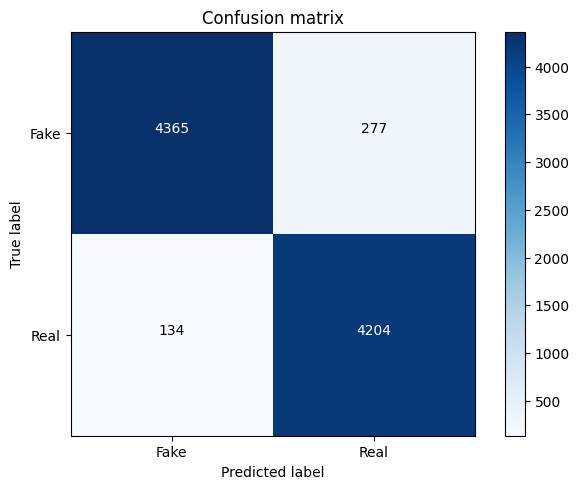

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Logistic Regression**

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy of the model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 98.82%


Confusion matrix, without normalization


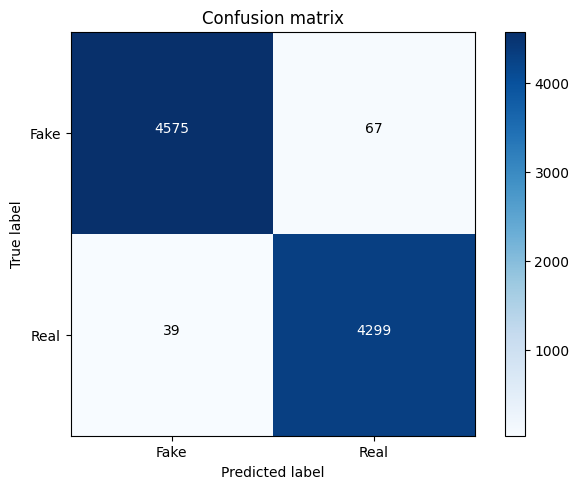

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter = 'best',
                                           random_state = 42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy of the model
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 99.6%


Confusion matrix, without normalization


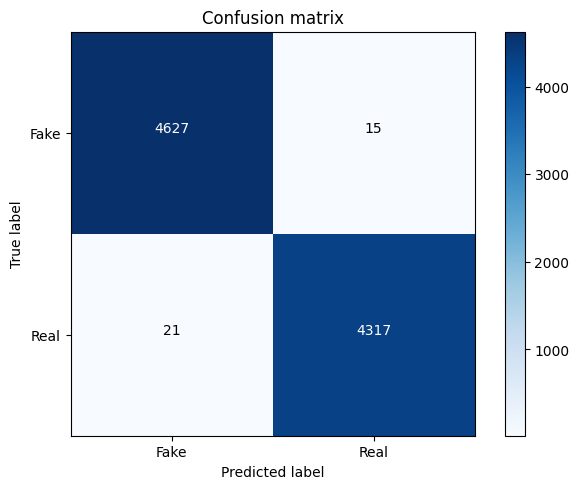

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators = 50, criterion = "entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 99.09%


Confusion matrix, without normalization


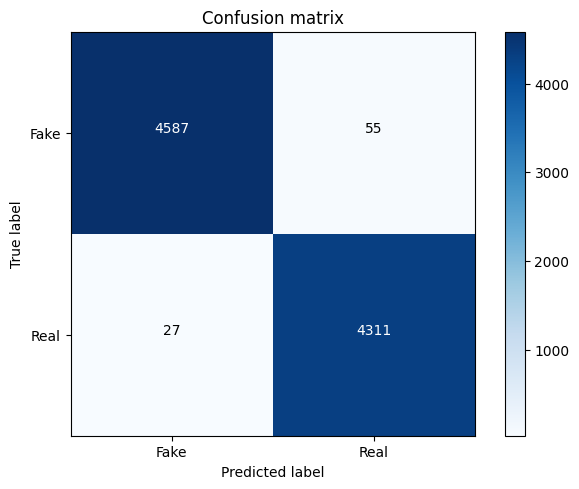

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**SVM Regression**

In [ ]:
from sklearn import svm

# Create a svm Classifier
# Linear Kernel
clf = svm.SVC(kernel = 'linear')

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100, 2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100, 2)

accuracy: 99.65%


Confusion matrix, without normalization


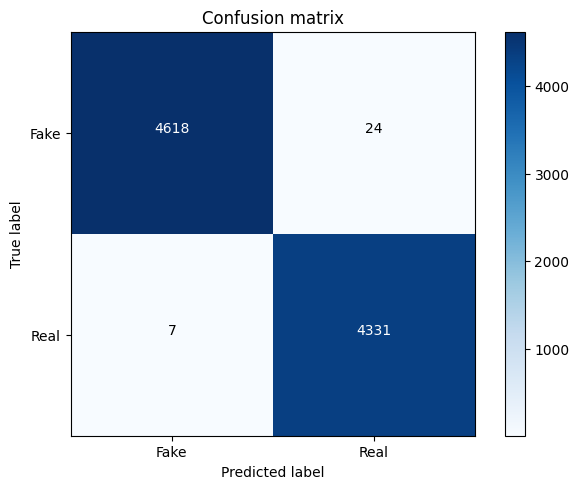

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])

**Comparing Different Models**

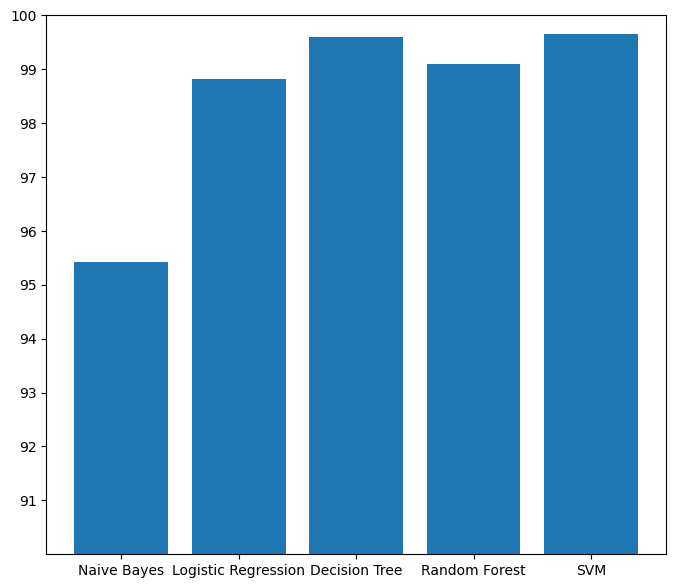

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 7))
plt.bar(list(dct.keys()), list(dct.values()))
plt.ylim(90, 100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.show()